0.6833333333333332
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7000000000000001
0.7166666666666667
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7833333333333332
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.7999999999

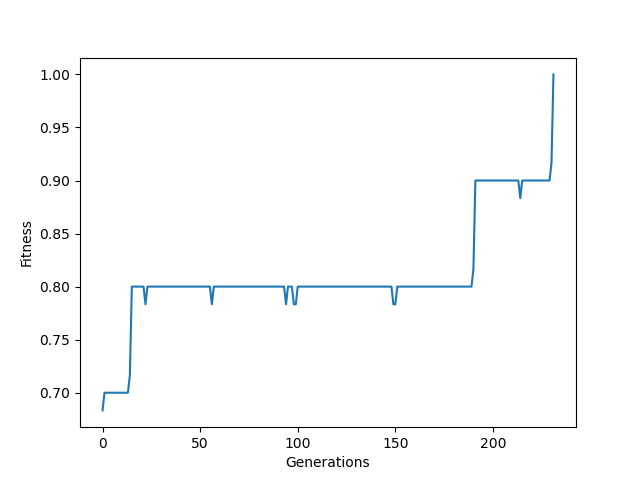

In [2]:
import random as r
import matplotlib.pyplot as plt

populationSize = 6  # how big of a population each generation will be (bigger = more accidental fitter individuals)
genomeSize = 10  # how big the data is (more data = more evolution necessary)
crossOverChance = 0.8  # how big the chance of crossover is
mutationChance = 0.001  # how big the change of mutation is (bigger genomes should have smaller mutation)
selectionConsiderationCutoff = 0.8  # how lenient the algorithm is in selecting its parents for the new generation
targetAverageFitness = 0.95  # at which average fitness the experiment should stop


determineFitness = lambda x: x.count("1") / len(x)
getRandomGenomes = lambda n: "".join([r.choice(["0", "1"]) for _ in range(n)])
getIndividual = lambda gen: (gen, determineFitness(gen))
mutateIndividual = lambda individual, chance: getIndividual("".join([x if r.random() > chance else str(int("0" in x)) for x in list(individual[0])]))
getAverageFitness = lambda pop: sum(list(zip(*pop))[1]) / len(pop)


def getTopPercentSample(pop, per):
    sortPop = sorted(pop, key=lambda tup: tup[1])
    return r.choices(sortPop[int((1-per)*len(sortPop))*-1:], k=2)


def getCrossedOverChildren(parents):
    childA, childB = list(parents[0][0]), list(parents[1][0])
    subSectionStart, subSectionEnd = r.randint(0, int(len(parents[0][0]) / 2)), r.randint(int(len(parents[0][0]) / 2),
                                                                                          int(len(parents[0][0])))
    childA[subSectionStart: subSectionEnd] = list(parents[1][0])[subSectionStart: subSectionEnd]
    childB[subSectionStart: subSectionEnd] = list(parents[0][0])[subSectionStart: subSectionEnd]
    return getIndividual("".join(childA)), getIndividual("".join(childB))

# Main loop
averageList = []
population = [getIndividual(getRandomGenomes(genomeSize)) for _ in range(populationSize)]
while getAverageFitness(population) < targetAverageFitness:
    newPopulation = []
    while len(newPopulation) < populationSize:
        children = getTopPercentSample(population, selectionConsiderationCutoff)

        if r.random() < crossOverChance:
            children = getCrossedOverChildren(children)

        for child in children:
            newPopulation.append(mutateIndividual(child, mutationChance))

    print(getAverageFitness(newPopulation))
    averageList.append(getAverageFitness(newPopulation))
    population = newPopulation

plt.plot(averageList)
plt.ylabel("Fitness")
plt.xlabel("Generations")
plt.show()